# Linear Regression Using One Variable With Cost Function and Gradient Descent

Building off the previous notebook, I will implement a cost function and gradient descent to improve the linear regression model. Using the same training set of house sales from Redfin.

Goals:
- Optimize parameters `w` and `b` for the linear regression model programmatically using gradient descent


## Tools
- NumPy
- Matplotlib

In [7]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from utils.regression_helpers import plt_intuition, plt_stationary
plt.style.use('../deeplearning.mplstyle')

## Problem Statement
Predict the price of a house based on its size in sqft. The training set will include some recent house sales from [Redfin](https://www.realtor.com/realestateandhomes-search/Roseville_CA/show-recently-sold). Where the input features are house size (1000 sqft) and output targets are the closing sale price (1000s of dollars). For example, the first training example in the table below is a house size of 1464 sqft which sold for $215,000.

| Size (1000 sqft) | Price (1000s of dollars) |
|------------------|--------------------------|
| 1.464            | 215.0                    |
| 2.39             | 635.0                    |
| 1.296            | 453.99                   |
| 2.838            | 1100.0                   |
| 2.37             | 673.0                    |
| 2.362            | 775.0                    |
| 1.343            | 559.9                    |
| 1.966            | 651.0                    |
| 1.974            | 565.0                    |
| 2.08             | 765.873                  |
| 0.974            | 452.5                    |
| 1.334            | 480.0                    |
| 1.822            | 730.0                    |
| 2.853            | 1206.5                   |

## Linear Regression Model, Cost Function, and Gradient Descent
Linear Regression Model:
$$f_{w,b}(x)=wx+b\tag{1}$$

Cost Function:
$$J(w,b)={1\over2m}\sum_{i=0}^{m-1}(f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$

Gradient Descent Algorithm:
Repeat until convergence {
$$w = w - \alpha * {\partial\over\partial{w}}J(w,b)\tag{3}$$
$$b = b - \alpha * {\partial\over\partial{b}}J(w,b)\tag{4}$$
}

where the paramters `w` and `b` are updated simultaneously. The gradient is defined as:

$${\partial\over\partial{w}}J(w,b)={1\over{m}}\sum_{i=0}^{m-1}(f_{w,b}(x^{(i)}) - y^{(i)})*x^{(i)}\tag{5}$$

$${\partial\over\partial{w}}J(w,b)={1\over{m}}\sum_{i=0}^{m-1}(f_{w,b}(x^{(i)}) - y^{(i)}\tag{6})$$

Calculating the parameters w and b simultaneously means calculating the partial derivative of all the parameters before updating the parameters with the new values.
### Terms
Linear Regression Model parameters: $$w, b\tag{7}$$
Learning rate - positive value between [0, 1]: $$\alpha\tag{8}$$
Partial derivative with respect to w:$${\partial\over\partial{w}}\tag{9}$$
Partial derivative with respect to b:$${\partial\over\partial{b}}\tag{10}$$

In [8]:
# Load training set
x_train = np.array([1.464, 2.39, 1.296, 2.838, 2.370, 2.362, 1.343, 1.966, 1.974, 2.080, .974, 1.334, 1.822, 2.853])
y_train = np.array([215, 635, 453.990, 1100, 673, 775, 559.90, 651, 565, 765.873, 452.5, 480, 730, 1206.50])
m = x_train.shape[0]

## Implement Gradient Descent
Implementing the gradient descent algorithm for one feature. We will need the following three functions:
- `compute_gradient`: implementing equation (5) and (6)
- `compute_cost`: implementing equation(2)
- `gradient_descent`: utilizing compute_gradient and compute_cost

### compute_gradient
`compute_gradient` implements equation (5) and (6) and returns the partial derivatives of the parameters: ${\partial\over\partial{w}}J(w,b)$, ${\partial\over\partial{b}}J(w,b)$

In [9]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    """
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i += (f_wb - y[i]) * x[i]
        dj_db_i += (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db
    

### compute_cost
`compute_cost` implements equation (2) and returns the total cost from the cost function J(w,b)

In [10]:
def compute_cost(x, y, w, b):
    """
    Compute cost function J(w,b)
    
    Args:
      x (ndarray (m,)): Data, m input examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    m = x.shape[0]
    total_cost = 0
    cost_sum = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost

    total_cost = (1/2*m) * cost_sum

    return total_cost

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

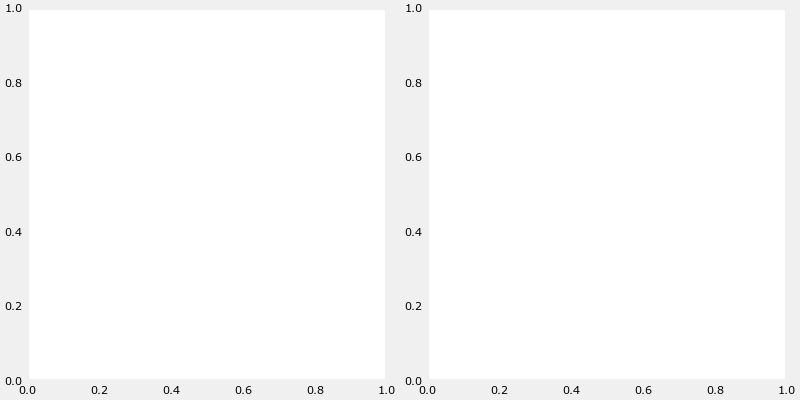

### gradient_descent

In [12]:
w = 200
b = 50

cost = compute_cost(x_train, y_train, w, b)
print(cost)

7601283.131603


TODO: Compute gradient, perform gradient descent, and plot things